# Pipeline_GridSearchCV

In [87]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Rozważmy zbiór Breast Cancer

In [88]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [89]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

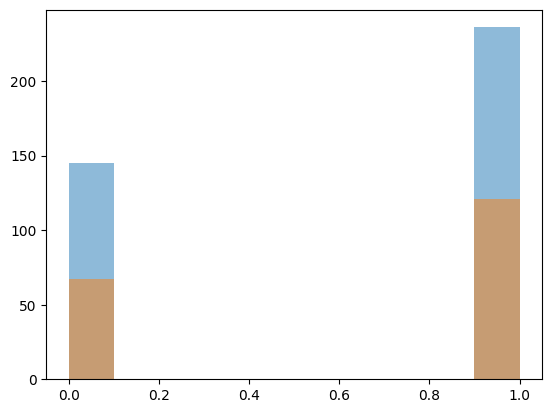

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Skalowanie danych już na początku w celu zmniejszenia czasu trenowania
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [91]:
seed = 123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [92]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = {
    'preprocessing': [StandardScaler(), None],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train_scaled, y_train)
grid_1.best_params_

{'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler()}

In [93]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array().flatten()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [94]:
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,param_preprocessing,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008522,0.003938,0.002383,0.001556,0.001,0.001,StandardScaler(),"{'classifier__C': 0.001, 'classifier__gamma': ...",0.623377,0.618421,...,0.619412,0.001982,29,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
1,0.040456,0.062087,0.023489,0.044993,0.001,0.001,None,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.623377,0.618421,...,0.619412,0.001982,29,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
2,0.011022,0.008906,0.006301,0.008971,0.001,0.01,StandardScaler(),"{'classifier__C': 0.001, 'classifier__gamma': ...",0.623377,0.618421,...,0.619412,0.001982,29,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
3,0.040472,0.065375,0.013650,0.022054,0.001,0.01,None,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.623377,0.618421,...,0.619412,0.001982,29,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
4,0.013557,0.004643,0.001249,0.001178,0.001,0.1,StandardScaler(),"{'classifier__C': 0.001, 'classifier__gamma': ...",0.623377,0.618421,...,0.619412,0.001982,29,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005


In [95]:
len(results.mean_test_score)

72

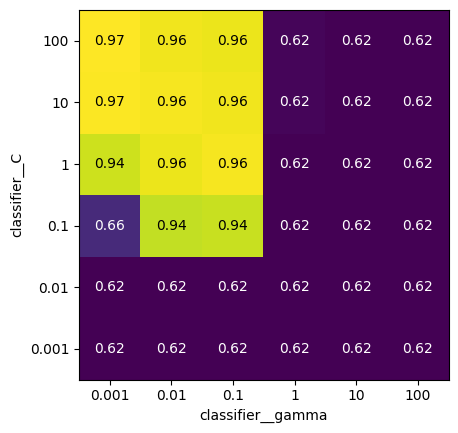

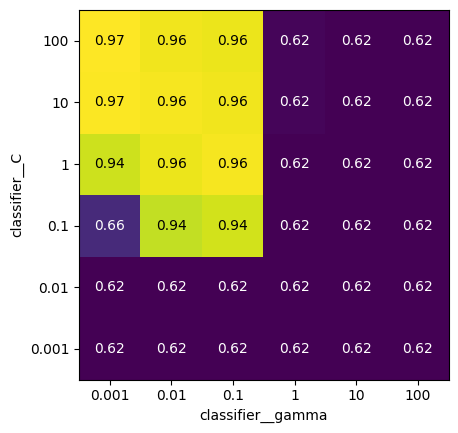

In [96]:
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:, :, 0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C',
        yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:, :, 1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C',
        yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

In [97]:
def grid_fit(pipe, param_grid):
    grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
    grid.fit(X_train_scaled, y_train)

    results = pd.DataFrame(grid.cv_results_)
    scores = np.array(results.mean_test_score).reshape(len(param_grid['classifier__C']),
                                                       len(param_grid.get('classifier__gamma', [1])), 2)

    return scores, grid.best_estimator_

In [98]:
def score_model(model):
    y_pred = model.predict(X_test_scaled)

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

In [99]:
param_grid_svm = {'preprocessing': [StandardScaler(), None],
                  'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

param_grid_lr = {'preprocessing': [StandardScaler(), None],
                 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

methods = [
    ("SVM Linear", Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear"))]),
     param_grid_svm),
    ("SVM RBF", Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="rbf"))])
     , param_grid_svm),
    ("SVM Poly", Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly"))])
     , param_grid_svm),
    ("Logistic Regression", Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())]),
     param_grid_lr)
]

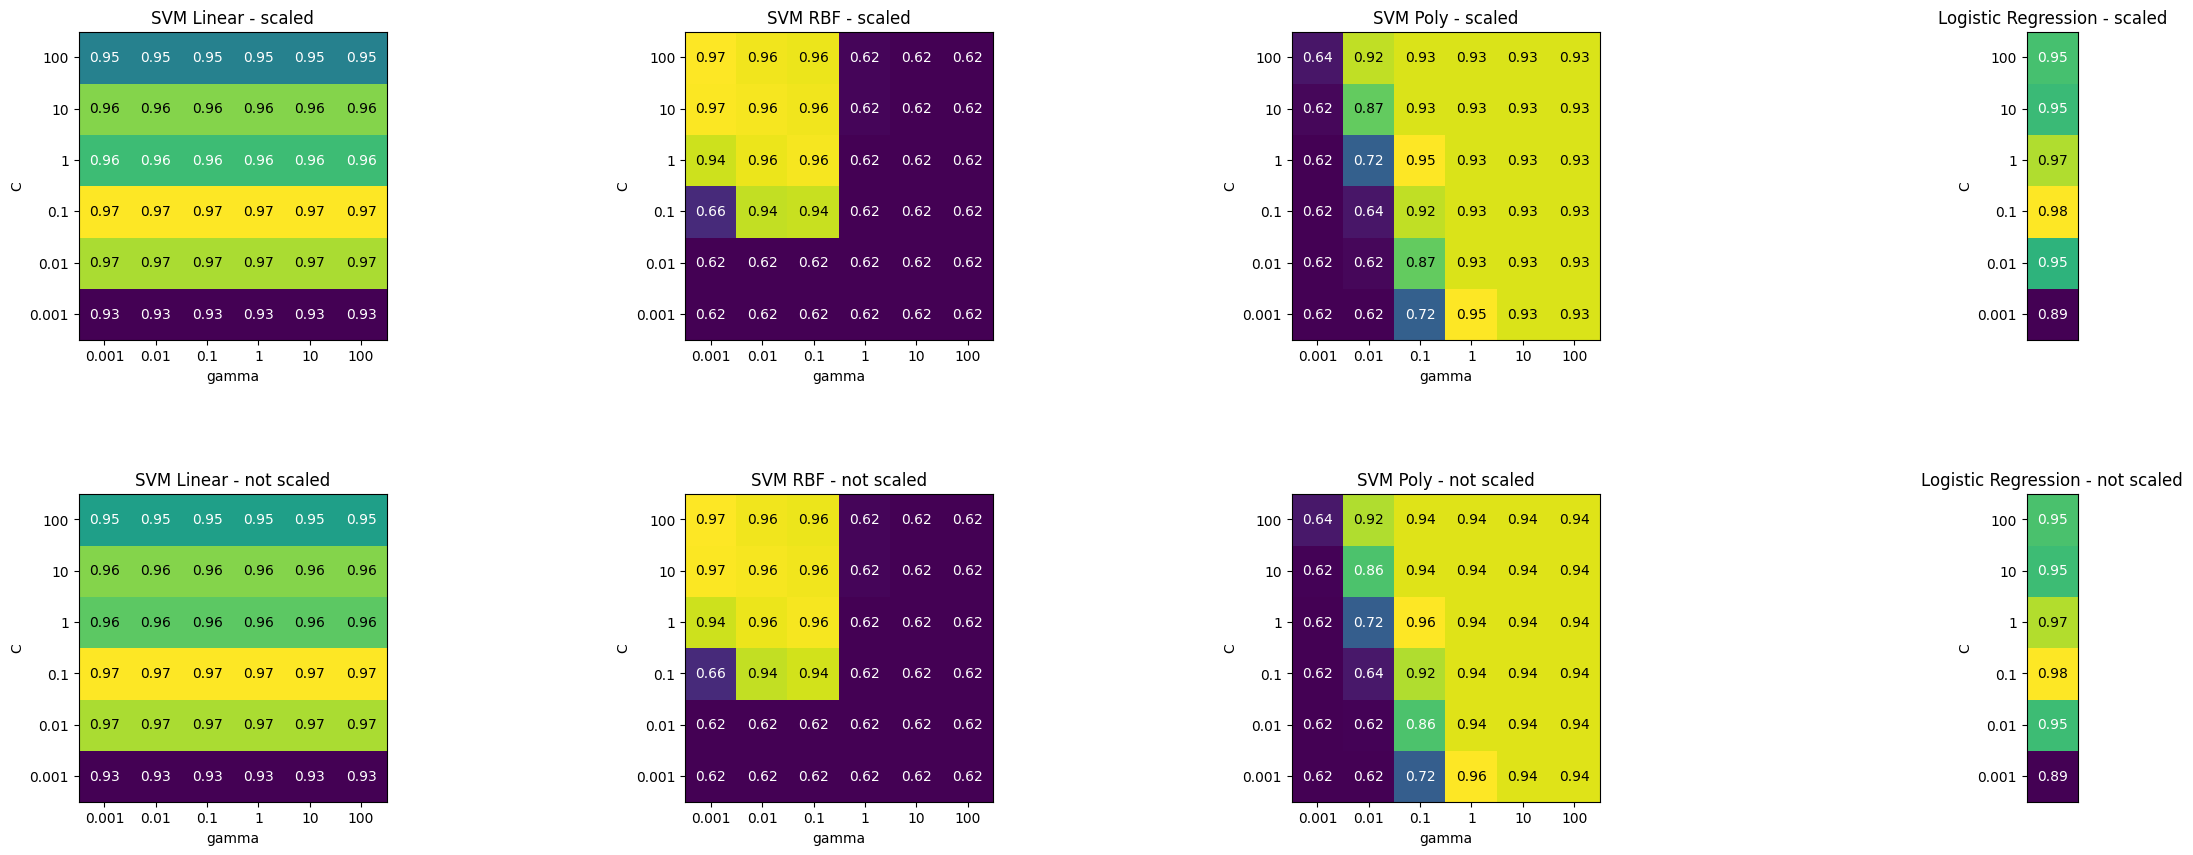

In [100]:
fig, axs = plt.subplots(2, 4, figsize=(30, 10))
plt.subplots_adjust(hspace=0.5)
df = pd.DataFrame(columns=["name", "precision", "recall", "f1", "accuracy"])

for i, (method, pipe, param_grid) in enumerate(methods):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        scores, best_model = grid_fit(pipe, param_grid)
        precision, recall, f1, accuracy = score_model(best_model)
        df.loc[i] = [method, *score_model(best_model)]

    heatmap(
        scores[:, :, 0],
        xlabel='gamma' if 'classifier__gamma' in param_grid.keys() else "",
        xticklabels=param_grid.get('classifier__gamma', []),
        ylabel="C",
        yticklabels=param_grid.get('classifier__C', []),
        cmap="viridis",
        ax=axs[0, i],
    )
    axs[0, i].set_title(f"{method} - scaled")
    heatmap(
        scores[:, :, 1],
        xlabel='gamma' if 'classifier__gamma' in param_grid.keys() else "",
        xticklabels=param_grid.get('classifier__gamma', []),
        ylabel="C",
        yticklabels=param_grid.get('classifier__C', []),
        cmap="viridis",
        ax=axs[1, i],
    )
    axs[1, i].set_title(f"{method} - not scaled")

plt.show()

In [101]:
df.head()

,name,precision,recall,f1,accuracy
0,SVM Linear,0.983471,0.983471,0.983471,0.978723
1,SVM RBF,0.983471,0.983471,0.983471,0.978723
2,SVM Poly,0.959677,0.983471,0.971429,0.962766
3,Logistic Regression,0.983607,0.991736,0.987654,0.984043
